(Defining latex commands: not to be shown...)
$$
\newcommand{\norm}[1]{\left \| #1 \right \|}
\DeclareMathOperator{\minimize}{minimize}
\newcommand{\real}{\mathbb{R}}
\newcommand{\normal}{\mathcal{N}}
$$

#  Gaussian Algebra (25 Points)

Prove that the product of two univariate (scalar) Gaussian distributions is a Gaussian again, i.e. show, by explicitly performing the required arithmetic transformations, that

\begin{equation}
   \normal(x;\mu,\sigma^2)\normal(x;m,s^2) = \normal[x; (\frac 1{\sigma^2}+\frac 1{s^2})^{-1}(\frac \mu{\sigma^2}+\frac m{s^2}),(\frac 1{\sigma^2}+\frac 1{s^2})^{-1}]\normal[m,\mu,\sigma^2+s^2].
\end{equation}

## Proof
\begin{align*}
   f(x) &= \frac{1}{\sqrt{2\pi\sigma^2}}\cdot e^{\frac{-(x-\mu)^2}{2\sigma^2}}\cdot \frac{1}{\sqrt{2\pi s^2}}\cdot e^{\frac{-(x-m)^2}{2s^2}}\\
   &=\frac{1}{2\pi s\sigma}\cdot e^{-\alpha}\\
   \text{where }\alpha &= \frac{s^2(x-\mu)^2+\sigma^2(x-m)^2}{2\sigma^2 s^2}\\
   &=\frac{(s^2+\sigma^2)x^2-2(s^2\mu+\sigma^2 m)x+s^2\mu^2+\sigma^2m^2}{2\sigma^2s^2}\\
   &=\frac{x^2-2\frac{s^2\mu+\sigma^2 m}{s^2+\sigma^2}x+\frac{s^2\mu^2+\sigma^2m^2}{s^2+\sigma^2}}{\frac{2\sigma^2s^2}{s^2+\sigma^2}}\\
   &=\frac{\left(x-\frac{s^2\mu+\sigma^2 m}{s^2+\sigma^2}\right)^2-\left(\frac{s^2\mu+\sigma^2 m}{s^2+\sigma^2}\right)^2+\frac{s^2\mu^2+\sigma^2m^2}{s^2+\sigma^2}}{\frac{2\sigma^2s^2}{s^2+\sigma^2}}\\
   &=\frac{\left(x-\frac{s^2\mu+\sigma^2 m}{s^2+\sigma^2}\right)^2}{\frac{2\sigma^2s^2}{s^2+\sigma^2}}+\underbrace{\frac{\frac{s^2\mu^2+\sigma^2m^2}{s^2+\sigma^2}-\left(\frac{s^2\mu+\sigma^2 m}{s^2+\sigma^2}\right)^2}{\frac{2\sigma^2s^2}{s^2+\sigma^2}}}_\beta\\
   \beta&= \frac{\frac{s^4\mu^2+s^2\sigma^2\mu^2+s^2\sigma^2m^2+\sigma^4m^2-\left(s^4\mu^2+2s^2\sigma^2\mu m+\sigma^4m^2\right)}{\left(s^2+\sigma^2\right)^2}}{\frac{2\sigma^2s^2}{s^2+\sigma^2}}\\
   &=\frac{s^2\sigma^2\left(\mu^2-2\mu m+m^2\right)}{2\sigma^2s^2\left(s^2+\sigma^2\right)}\\
   &=\frac{(\mu-m)^2}{2(s^2+\sigma^2)}\\
   \Rightarrow f(x)&=\frac{1}{2\pi s\sigma}\cdot e^{-(\alpha-\beta)-\beta}\\
   &=\frac{1}{2\pi s\sigma}\cdot e^{-\frac{\left(x-\frac{s^2\mu+\sigma^2 m}{s^2+\sigma^2}\right)^2}{\frac{2\sigma^2s^2}{s^2+\sigma^2}}}\cdot e^{-\frac{(\mu-m)^2}{2(s^2+\sigma^2)}}\\
   &=\frac{\sqrt{2\pi(s^2+\sigma^2)}\sqrt{2\pi\frac{\sigma^2s^2}{s^2+\sigma^2}}}{2\pi s\sigma}\normal\left[x;\frac{s^2\mu+\sigma^2 m}{s^2+\sigma^2},\frac{\sigma^2s^2}{s^2+\sigma^2}\right]\normal\left[\mu;m,\sigma^2+s^2\right]\\
   &=\frac{\sqrt{2\pi\cdot 2\pi\sigma^2s^2}}{2\pi s\sigma}\normal\left[x; \left(\frac 1{\sigma^2}+\frac 1{s^2}\right)^{-1}\left(\frac \mu{\sigma^2}+\frac m{s^2}\right),\left(\frac 1{\sigma^2}+\frac 1{s^2}\right)^{-1}\right]\normal\left[\mu;m,\sigma^2+s^2\right]\\
   &=\normal\left[x; \left(\frac 1{\sigma^2}+\frac 1{s^2}\right)^{-1}\left(\frac \mu{\sigma^2}+\frac m{s^2}\right),\left(\frac 1{\sigma^2}+\frac 1{s^2}\right)^{-1}\right]\normal\left[\mu;m,\sigma^2+s^2\right]\hspace{2cm} q.e.d.
\end{align*}

#  Maximum Likelihood Estimator of Simple Linear Regression (25 Points)

Derive the formula $\mathbf{w}_{MLE} = (X^TX)^{-1}X^T\mathbf{y}$ from the lecture, by calculating the derivative of $p(\mathbf{y}\,|X,\mathbf{w}) = \normal(\mathbf{y}\,|X\mathbf{w}, \sigma^2I)$ with respect to $\mathbf{w}$, setting it to zero and solving it for $\mathbf{w}$.


Note: _To refresh your linear algebra you might find it useful to have a look in [here](http://webdav.tuebingen.mpg.de/lectures/ei-SS2015/pdfs/Murray_cribsheet.pdf)._

#  Linear regression (50 Points)

In this exercise you will perform a regression analysis on a toy dataset. You will implement ridge regression and learn how to find a good model through a comparative performance analysis.

1) Download the [training set](http://webdav.tuebingen.mpg.de/lectures/ei-SS2015/data/ex1_train.csv)! <br>
2) Implement $\mathbf{w}_{RIDGE}$ as a function of a given $X, \mathbf{y}$ array and a regularization parameter $\lambda$!

In [15]:
# Loading the required packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
import csv

In [16]:
def wRidge(X,y,lamb):
  # Change the following line and implement the ridge regression estimator wRidge
  #w = np.zeros(X.shape[-1])
    #print y
    #print np.dot(np.dot(np.linalg.inv((np.dot(X.T,X)+lamb*np.identity(X.shape[-1]))),X.T),y)
    return np.dot(np.dot(np.linalg.inv((np.dot(X.T,X)+lamb*np.identity(X.shape[-1]))),X.T),y)

3) Load "ex1_train.csv" into a numpy array! The first column in the csv file is $X$ and the second column is $\mathbf{y}$, assign them to each variable!

In [17]:
# Read ex1_train.csv and assign the first column and 
# second column to variables x and y respectively.


a = np.genfromtxt('ex1_train.csv', delimiter=' ')
x= a[:,0]
y= a[:,1]


4) Plot the training data with appropriate labels on each axes!

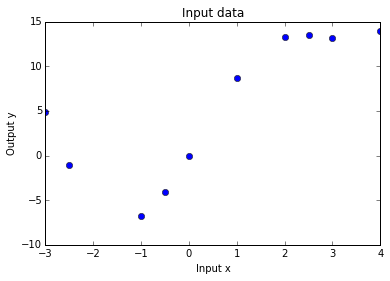

In [18]:
# Plot the input data here
plt.plot(x,y,'o')
plt.title('Input data')
plt.ylabel('Output y')
plt.xlabel('Input x')   

5) Implement a function which constructs features upto a input polynomial degree $d$!<br>
Note: _Constructing higher polynomial features is similar to what you implemented in Exercise 3 (SVM) of the previous exercise sheet._

In [19]:
def construct_poly(x,d):
  ## Implement a method which given an array of size N, 
  ## returns an array of dimension (N,d)
    poly=np.empty((len(x),1), float)
    xr = np.reshape(x,(len(x),1))

    for i in range(d-1):
        poly = np.append(poly, (xr**i), axis=1)
    #print poly 
    #print np.shape(poly)
    return poly

6) Implement the Mean Squared Error Loss (MSE) as a function of the predicted and true values of the target variable! <br>

In [20]:
def MSE(y_predict,y_true):
  ## Implement mean squared error for a given input y and its predictions.
  return (np.linalg.norm(y_predict-y_true)**2)/y_predict.shape[0]

7) By comparing the MSE find the degree $d$ for the polynomial that fits the training data best! You might find it useful to use the code below to interactively change the variable $d$, set $\lambda = 1$ and keep it fixed. Plot the error as a function of different values of $d$!<br>

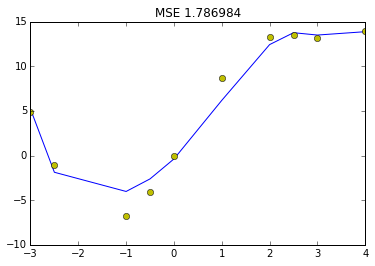

In [24]:
##This function provides an interactive mode to change polynomial degree. 
@interact(n=[1,16])
def plot(n):
    X = construct_poly(x,n) #n=d
    w = wRidge(X,y,1.0)
    plt.plot(x,X.dot(w))
    plt.title("MSE %f" % MSE(X.dot(w),y))
    plt.plot(x,y,'yo')

8) Apply models with different values of $d$ after being trained on the training dataset, to the test data available [here](http://webdav.tuebingen.mpg.de/lectures/ei-SS2015/data/ex1_test.csv). Compare the errors on the test data to the ones from the training by plotting the error curves as functions of the polynomial degree in a single plot! What do you conclude? <br>

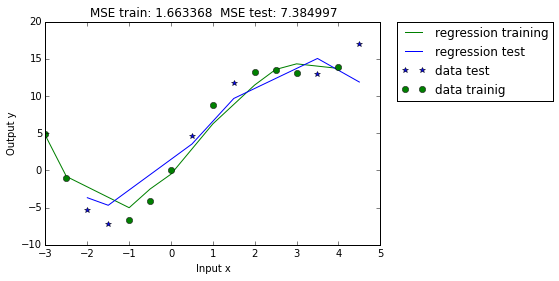

In [53]:
## Read test data here
a = np.genfromtxt('ex1_test.csv', delimiter=' ')
xt= a[:,0]
yt= a[:,1]
X = construct_poly(x,8)
w = wRidge(X,y,1.0)
@interact(n=[1,16])
def plot(n):
    X = construct_poly(x,n)  
    Xt = construct_poly(xt,n) #n=d
    w = wRidge(X,y,1.0)
    plt.plot(x,X.dot(w),'g',label='regression training')
    plt.plot(xt,Xt.dot(w),'b',label='regression test')
    plt.title("MSE train: %f  MSE test: %f" % (MSE(X.dot(w),y),MSE(Xt.dot(w),yt)))
    plt.plot(xt,yt,'b*',label='data test')
    plt.plot(x,y,'go',label='data trainig')
    plt.ylabel('Output y') 
    plt.xlabel('Input x')  
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Conclusion:
We get suitable solutions for n from 5 to 7 for the test regression. For higher values we get overfitting. For lower ones underfitting.
The MSE of the test regression is always higher than the one of the training regression.
That's evident because the regression function is fitted to the values of the training data and so doesn't provide an optimal fitting for the test data.


9) With a fixed optimal $d$, change the value of $\lambda$ to one of the following values $[0.1, 1.0, 10.0]$ and find the minimum MSE!<br>

Minimum MSE: 0.6275


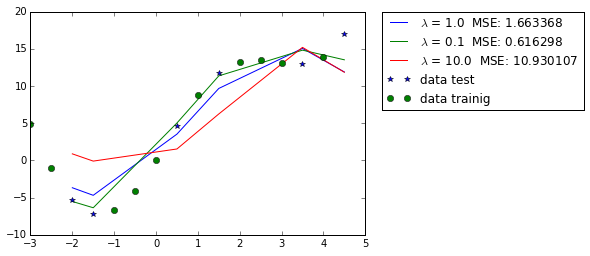

In [54]:

def plot():
    X = construct_poly(x,6)  
    Xt = construct_poly(xt,6) #n=d
    w = wRidge(X,y,1.0)
    plt.plot(xt,Xt.dot(w),label='$\lambda$ = 1.0'+ "  MSE: %f" % MSE(X.dot(w),y))
    #plt.title("MSE %f" % MSE(X.dot(w),y))
   
    
    w = wRidge(X,y,0.1)
    plt.plot(xt,Xt.dot(w),label='$\lambda$ = 0.1'+ "  MSE: %f" % MSE(X.dot(w),y))
    
    
    w = wRidge(X,y,10.0)
    plt.plot(xt,Xt.dot(w),label='$\lambda$ = 10.0'+"  MSE: %f" % MSE(X.dot(w),y))
 
  
    
    plt.plot(xt,yt,'b*',label='data test')
    plt.plot(x,y,'go',label='data trainig')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plot()
print "Minimum MSE: 0.6275"

Hand in printed copy of completed notebook.